In [1]:
import sys
sys.path.append('../../')
from src.util.config import Config

**Setting**
create specific Cournot Pricing setting

In [2]:
# parameter demand (default: 1, 1)
slope = 1
intercept = 1

# parameter mechanism
bidder = ['1']*2
o_space = {'1': [0.0, slope/intercept]}
a_space = {'1': [0.0, slope/intercept]}

param_prior = {
    'distribution': 'uniform',
    }

param_util = {
    'demand': 'linear', 
    'slope': slope, 
    'intercept': intercept,
}
                                                                  
# parameter approximation game
n = 64
m = 64

config = Config()
config.create_config_game("cournot_pricing", bidder, o_space, a_space, param_prior, param_util, n, m)
game = config.create_game()
if not game.mechanism.own_gradient:
    game.get_utility()

**Learner**
Specify Learning Algorithm

In [3]:
# parameter learner
max_iter = int(2e3)
tol = 1e-4
stop_criterion = 'util_loss'
param_learner = {
    "mirror_map": "euclidean",
    "steprule_bool": True,
    "eta": 1,
    "beta": 0.5,
}

config.create_config_learner("soma", max_iter, tol, stop_criterion, param_learner)
learner = config.create_learner()

Run Learning Algorithm

In [4]:
#create and initialize strategies
strategies = config.create_strategies(game, "random")

# run learn algorithm
learner.run(game, strategies, disable_tqdm_bool=False, print_result_bool=True, save_history_bool=True)

100%|████████████████████| 2.00k/2.00k [00:01<00:00, 1.04kit/s]

No convergence with stopping criterion
Current value of (util_loss): 0.00017
Best value of (util_loss)   : 0.00017)


Visualization of the learning process and the final result - analytical BNE according to Lofaro (2002) / Ferreira & Ferreira (2010)

In [5]:
import numpy as np

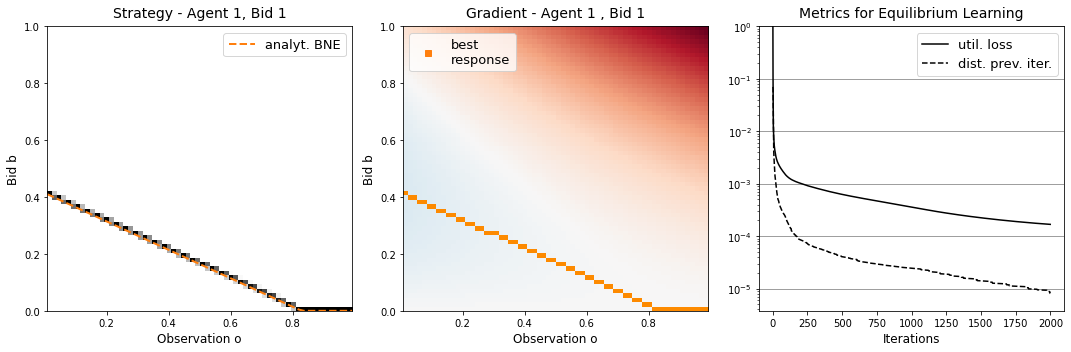

In [6]:
BNE_vfunc = np.vectorize(game.mechanism.BNE_func)

strategies['1'].plot(grad=True, metrics=True, beta=lambda x: BNE_vfunc(x))